In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')

In [2]:

data = np.array(data)
data_test = np.array(data_test)

m, n = data.shape
m_test, n_test = data_test.shape

data_dev = data[0:1000].T
data_test = data_test.T
data_train = data[1000:m].T

Y_dev = data_train[0]
X_dev = data_train[1:n]
X_dev = X_dev / 255

X_test = data_test / 255

Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
_, m_train = X_train.shape

In [3]:

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2



def ReLU(Z):
    return np.maximum(Z, 0)


def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A


def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


def ReLU_deriv(Z):
    return Z > 0


def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


def get_predictions(A2):
    return np.argmax(A2, 0)


def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(
            W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


def blind_prediction(index, W1, b1, W2, b2):
    current_image = X_test[:, index, None]
    prediction = make_predictions(X_test[:, index, None], W1, b1, W2, b2)
    print("Prediction: ", prediction)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [4]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 600)

Iteration:  0
[4 7 4 ... 4 8 7] [1 5 1 ... 7 6 9]
0.06424390243902439
Iteration:  10
[4 2 1 ... 7 7 6] [1 5 1 ... 7 6 9]
0.1675609756097561
Iteration:  20
[4 2 1 ... 7 2 6] [1 5 1 ... 7 6 9]
0.23958536585365853
Iteration:  30
[1 2 1 ... 7 0 6] [1 5 1 ... 7 6 9]
0.3011219512195122
Iteration:  40
[1 6 1 ... 7 2 6] [1 5 1 ... 7 6 9]
0.3748292682926829
Iteration:  50
[1 6 1 ... 7 2 2] [1 5 1 ... 7 6 9]
0.44546341463414635
Iteration:  60
[1 6 1 ... 7 2 2] [1 5 1 ... 7 6 9]
0.5031219512195122
Iteration:  70
[1 6 1 ... 7 2 2] [1 5 1 ... 7 6 9]
0.5513170731707318
Iteration:  80
[1 6 1 ... 7 6 2] [1 5 1 ... 7 6 9]
0.5900975609756097
Iteration:  90
[1 6 1 ... 7 6 8] [1 5 1 ... 7 6 9]
0.6198780487804878
Iteration:  100
[1 6 1 ... 7 6 8] [1 5 1 ... 7 6 9]
0.6449512195121951
Iteration:  110
[1 6 1 ... 7 6 8] [1 5 1 ... 7 6 9]
0.6645853658536586
Iteration:  120
[1 6 1 ... 7 6 8] [1 5 1 ... 7 6 9]
0.6823414634146342
Iteration:  130
[1 6 1 ... 7 6 8] [1 5 1 ... 7 6 9]
0.696780487804878
Iteration:  140

Prediction:  [1]
Label:  1


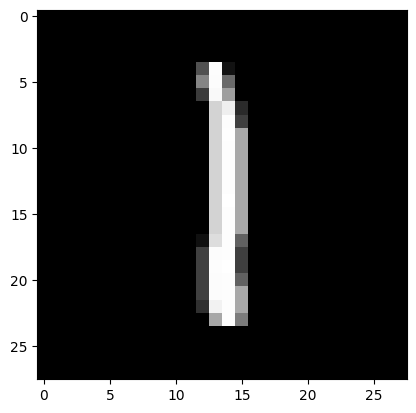

Prediction:  [6]
Label:  5


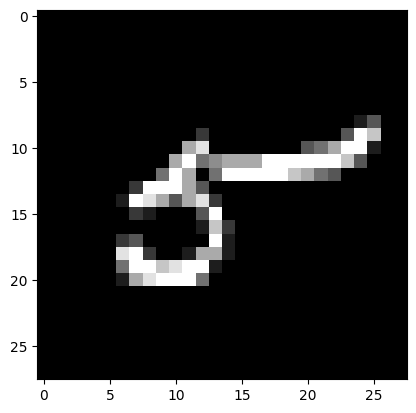

Prediction:  [1]
Label:  1


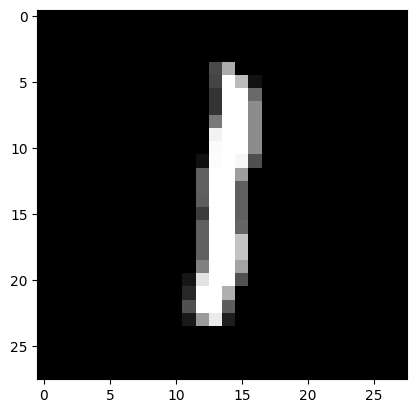

Prediction:  [7]
Label:  7


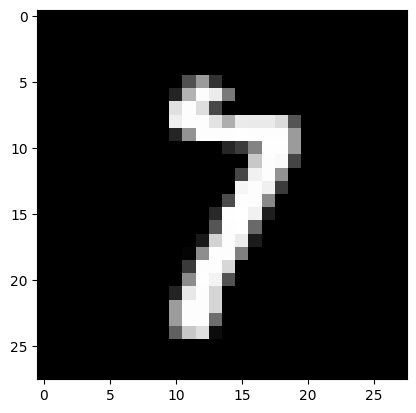

Prediction:  [4]
Label:  4


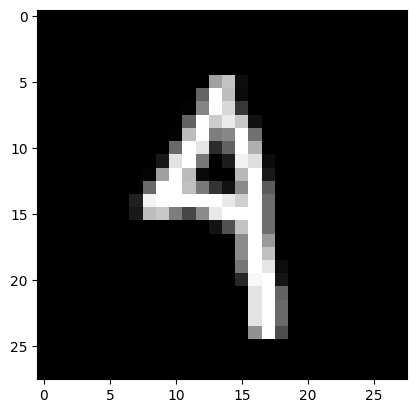

Prediction:  [8]
Label:  8


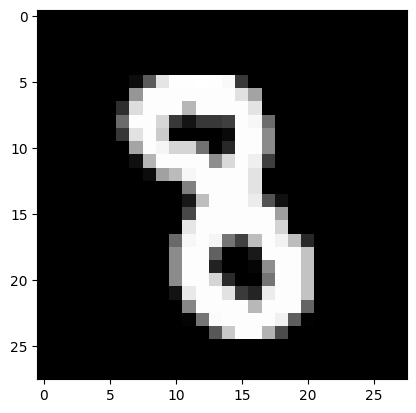

Prediction:  [9]
Label:  9


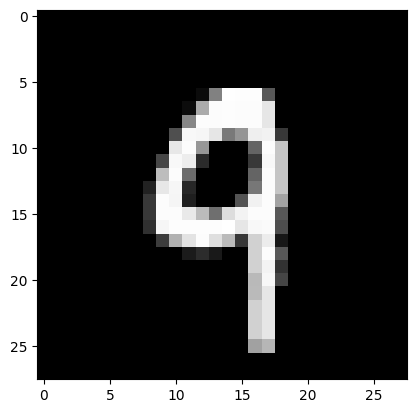

In [5]:

test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)

Prediction:  [9]


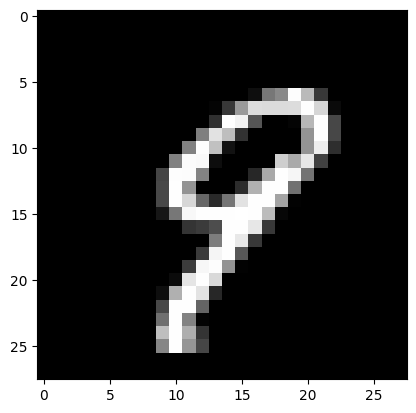

Prediction:  [8]


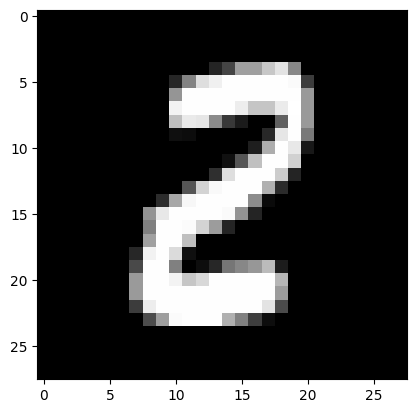

Prediction:  [4]


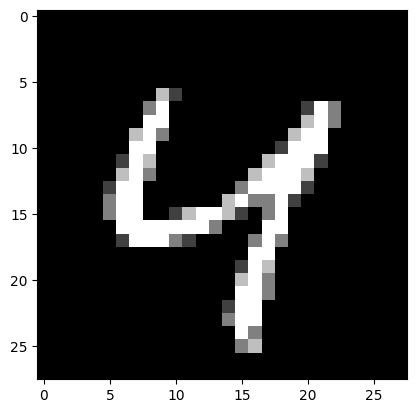

In [6]:

blind_prediction(67, W1, b1, W2, b2)
blind_prediction(47, W1, b1, W2, b2)
blind_prediction(14, W1, b1, W2, b2)


In [7]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
print(get_accuracy(dev_predictions, Y_dev))

[1 6 1 ... 7 6 9] [1 5 1 ... 7 6 9]
0.8546829268292683
